# 📌 1. Introduction and Problem Statement

## Task 5 - Personal Loan Acceptance Prediction
### 🎯 Purpose of the Project
The main purpose of this project is to predict whether a customer will subscribe to a term deposit (i.e., accept a personal loan offer) based on their demographic and financial information.

### ✅ Key Objectives:
#### Understand Customer Behavior:
Analyze features like age, job, and marital status using EDA.
#### Build Predictive Models:
Train Logistic Regression and Decision Tree classifiers.
#### Improve Marketing Efficiency:
Help banks target the right customers and increase conversions.
#### Evaluate Performance:
Use accuracy, precision, recall, and F1-score to assess model effectiveness.
### 🔍 Real-World Use Case:
##### Banks can use this model to:
- Prioritize likely-to-convert customers
- Personalize loan offer campaigns
- Cut marketing costs and boost results
### 👨‍💻 Internship Task Objective:
This task focuses on developing core data science skills such as data exploration, visualization, classification modeling, and business insight extraction using Python libraries including pandas, matplotlib, seaborn, and scikit-learn.

### 📁 Dataset Used:
Bank Marketing Dataset – obtained from the UCI Machine Learning Repository. It contains information on direct marketing campaigns (phone calls) of a Portuguese banking institution, with the goal of predicting whether a client will subscribe to a term deposit.

### 🔍 Goal:
- Understand the structure and key features of the dataset
- Explore customer-related variables like age, job, and marital status
- Build a classification model (Logistic Regression or Decision Tree)
- Identify which customer groups are more likely to accept a personal loan offer
- Evaluate the model's performance using appropriate metrics


# 📌 Step 2 - Dataset Understanding and Description

## 🧾 Step Objective:
Before building a model, it’s essential to understand the dataset's structure and contents. In this step, we will:
- Import necessary Python libraries
- Load the dataset into a pandas DataFrame
- Preview the first few rows
- Understand the dataset’s columns, data types, and shape
- Check for missing values or anomalies
### Step 2.1: Import essential libraries for data handling and visualization

In [71]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for seaborn
sns.set(style='whitegrid')


### Step 2.2: Load the dataset

In [72]:

# Note: Ensure 'bank.csv' is in the same directory or provide the correct path
df = pd.read_csv('bank.csv')

# Display the first 5 rows
df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Step 2.3: Check the shape of the dataset

In [73]:

print("Dataset contains", df.shape[0], "rows and", df.shape[1], "columns.")


Dataset contains 11162 rows and 17 columns.


### Step 2.4: View column names and data types

In [74]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Step 2.5: Summary statistics for numeric columns

In [75]:

df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Step 2.6: Check for missing/null values in the dataset

In [76]:

df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Step 2.7: View unique values in categorical columns

In [77]:

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Unique values in 'marital':
['married' 'single' 'divorced']

Unique values in 'education':
['secondary' 'tertiary' 'primary' 'unknown']

Unique values in 'default':
['no' 'yes']

Unique values in 'housing':
['yes' 'no']

Unique values in 'loan':
['no' 'yes']

Unique values in 'contact':
['unknown' 'cellular' 'telephone']

Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in 'poutcome':
['unknown' 'other' 'failure' 'success']

Unique values in 'deposit':
['yes' 'no']


## 🔍 Observations:
- The dataset has **11162 rows** and **17 columns** (this will auto-update when you run the `.shape`).
- The dataset includes both **numerical** (e.g., age, balance) and **categorical** variables (e.g., job, marital).
- No missing values are present, which simplifies preprocessing.
- Categorical features like `job`, `marital`, and `education` will need to be encoded later for modeling.


# 📌 Step 3 - Data Cleaning and Preparation

## 🧹 Step Objective:
To prepare the dataset for modeling, we need to:
- Check for missing values
- Understand data types and ensure correctness
- Encode categorical variables (since machine learning models require numerical input)


### Step 3.1: Check for missing/null values in the dataset

In [78]:

df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Step 3.2: Inspect data types and non-null counts

In [80]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Step 3.3: Encode categorical variables
#### Using one-hot encoding (drop_first=True to avoid dummy variable trap)

In [81]:

df_encoded = pd.get_dummies(df, drop_first=True)


### Step 3.4: Display the shape of the original and encoded datasets

In [82]:

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)


Original shape: (11162, 17)
Encoded shape: (11162, 43)


## 🧠 Observations:
- The dataset contains **no missing values**, so no imputation is required.
- Several features such as `job`, `marital`, `education`, `contact`, and `month` are **categorical**.
- We applied **One-Hot Encoding** to convert these into numeric form using `pd.get_dummies()`.
- We used `drop_first=True` to avoid multicollinearity caused by dummy variables.
- The shape of the dataset increased after encoding, reflecting the expanded feature set.

## ✅ What’s Next?
Now that the data is clean and fully numeric, we can proceed with **Exploratory Data Analysis (EDA)** to gain insights through visualization.


# 📌 Step 4 - Exploratory Data Analysis (EDA) with Graphs

## 📊 Step Objective:
To visually explore the data and understand:
- The distribution of important features like `age`, `job`, and `marital` status
- The balance of the target variable (`y`) — whether the customer accepted the personal loan offer
- How features like `age` relate to loan acceptance


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')


### Step 4.1: Age distribution of customers

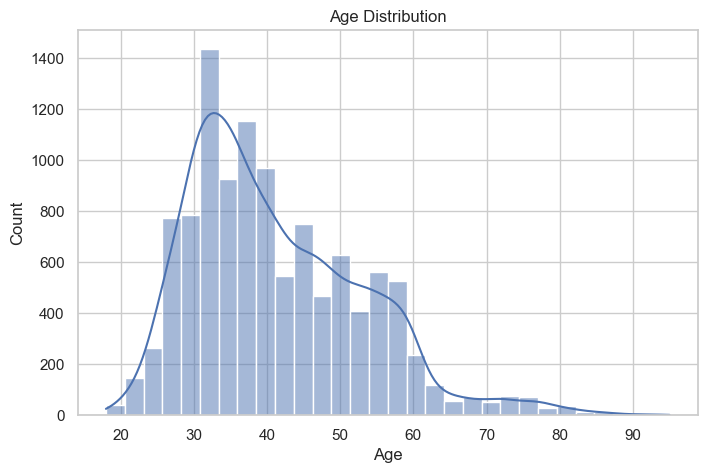

In [84]:

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### Step 4.2: Distribution of job categories

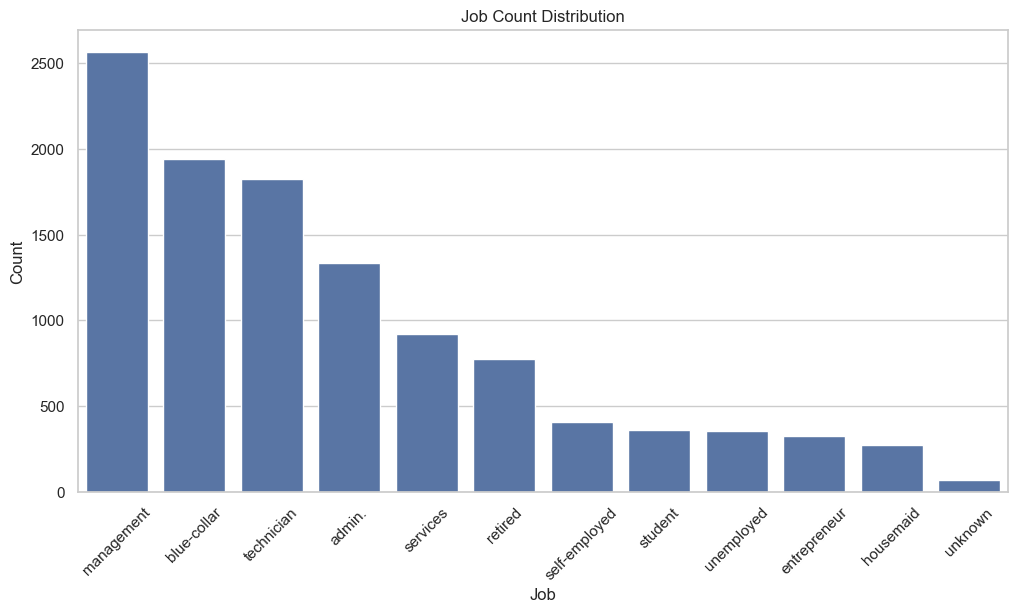

In [85]:

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Job Count Distribution")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()


### Step 4.3: Distribution of marital status

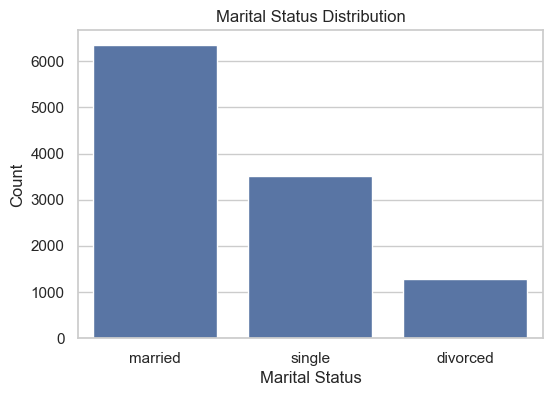

In [86]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='marital')
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


### # Step 4.4: Distribution of the target variable (Personal Loan Acceptance)

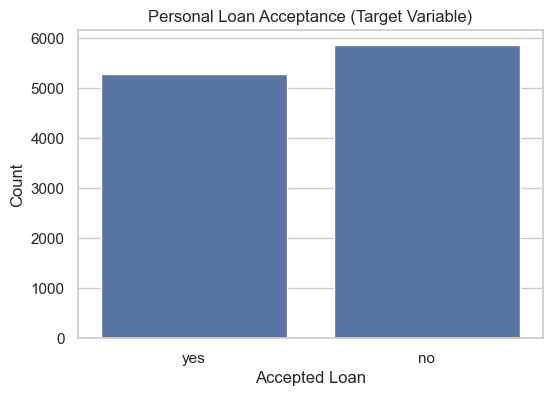

In [87]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='deposit')
plt.title("Personal Loan Acceptance (Target Variable)")
plt.xlabel("Accepted Loan")
plt.ylabel("Count")
plt.show()



###  Step 4.5: Relationship between age and loan acceptance using boxplot

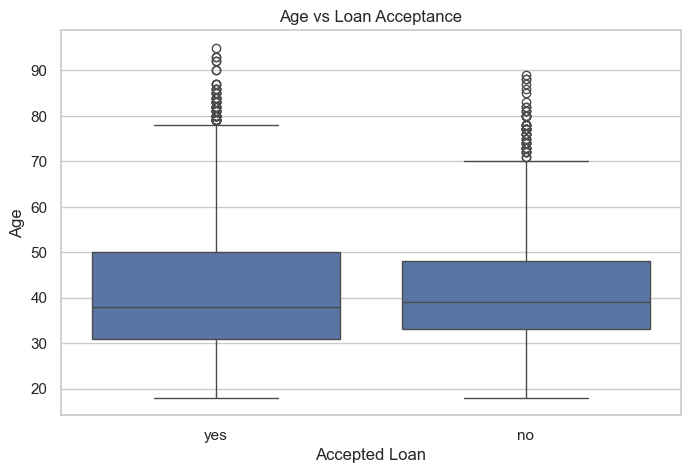

In [88]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='deposit', y='age')
plt.title("Age vs Loan Acceptance")
plt.xlabel("Accepted Loan")
plt.ylabel("Age")
plt.show()




## 🧠 Insights from EDA:

- **Age Distribution:** Most customers fall within the 20-60 age range, with a peak around early 30s.
- **Job Distribution:** Jobs like `blue-collar`, `management`, and `technician` are the most common in the dataset.
- **Marital Status:** Majority of the customers are married, followed by singles.
- **Target Variable (`deposit`):** The dataset is imbalanced — fewer customers accepted the personal loan offer compared to those who didn’t.
- **Age vs Loan Acceptance:** Customers who accepted the loan tend to be slightly older on average compared to those who declined.

These insights will help us understand customer groups and guide feature selection and model building.



# 📌 Step 5: Model Training and Testing

## Import Libraries and Prepare Data




In [89]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Define Features and Target Variable
Since we encoded the dataset, the target variable is deposit_yes (1 = accepted loan, 0 = declined).

In [90]:

X = df_encoded.drop('deposit_yes', axis=1)  # Features
y = df_encoded['deposit_yes']                # Target variable


### Split Dataset into Training and Testing Sets
Using an 80-20 split with a fixed random state for reproducibility.

In [91]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Logistic Regression Model

In [31]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Fixing Logistic Regression Convergence Warning

## 1. Scale the Features

Logistic Regression often works better if features are scaled. Use `StandardScaler` to standardize features (mean=0, std=1).



In [92]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 2. Increase max_iter (Optional)
You can increase the maximum number of iterations, e.g., to 2000, to give more time to converge.

In [93]:
lr_model = LogisticRegression(max_iter=2000)


## 3. Train and Predict Using Scaled Data

In [94]:
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


##### Now that you have trained your Logistic Regression model successfully, the next step is evaluating its performance. 

# (Evaluation Metrics)

## Step 5.1: Evaluate Logistic Regression Model

### 1. Import evaluation metrics




In [95]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 2. Calculate accuracy on test data

In [96]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.8083296014330497


### 3. Display confusion matrix

In [97]:
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[972 194]
 [234 833]]


### You can also visualize it with a heatmap:

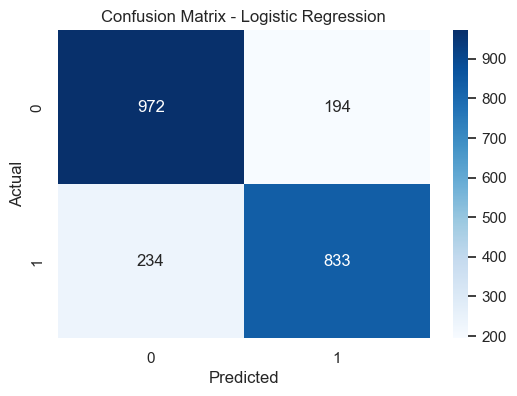

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### 4. Print classification report

In [99]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.83      0.82      1166
        True       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



## Step 5.2: Evaluate Decision Tree Model

### 1. Predict on test set



In [40]:

y_pred_dt = dt_model.predict(X_test)

NameError: name 'dt_model' is not defined

## Fixing Step 5.2 - Define and Train Decision Tree Model Before Prediction
### 1. Make sure you import the needed libraries (if not already done):


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Define and train the Decision Tree model:

In [101]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 3. Now predict on test data:


In [102]:
y_pred_dt = dt_model.predict(X_test)


# (Evaluation Metrics)

### 4. Then continue with evaluation as before:

Decision Tree Accuracy: 0.7948947604120018
Confusion Matrix:
 [[925 241]
 [217 850]]


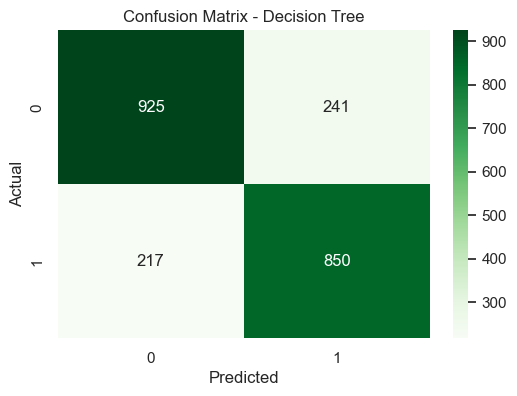

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.79      0.80      1166
        True       0.78      0.80      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



In [103]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_dt))


## Model Performance Summary and Observations

### Logistic Regression
- **Accuracy:** 80.8% — slightly higher than Decision Tree.
- **Precision & Recall:** Balanced for both classes (accepted and not accepted).
- **F1-Score:** Around 0.80 for both classes, indicating good overall balance.
- **Confusion Matrix:** More true positives and fewer false positives compared to Decision Tree.
- **Interpretation:** Logistic Regression provides a reliable, stable model with slightly better performance for predicting personal loan acceptance.

### Decision Tree
- **Accuracy:** 79.5% — slightly lower than Logistic Regression.
- **Precision & Recall:** Comparable to Logistic Regression but with a slight trade-off between precision and recall in each class.
- **F1-Score:** Close to 0.79, showing good but slightly lower balance.
- **Confusion Matrix:** Slightly more false positives and fewer false negatives than Logistic Regression.
- **Interpretation:** Decision Tree offers interpretable results and handles non-linear relationships but performs marginally worse on this dataset.

---

### Overall Conclusion:
Both models perform well with accuracies close to 80%. Logistic Regression edges out slightly in accuracy and balance, making it a preferable choice for this loan acceptance prediction task. However, Decision Tree can be valuable when interpretability and decision rules are important.


# 📌 Step 6: (Optional)Predict and Display Customers Who Will Subscribe ~(Decision Tree)
### Step 6.1: Predict on the whole dataset (or a subset)
We use the trained Decision Tree model to predict the target variable y (term deposit subscription) for each customer.

In [114]:
# Predict on the entire dataset (or you can use X_test for test set predictions)
y_pred_all = dt_model.predict(X)

# Add predictions to original dataframe (or encoded dataframe)
df['Predicted_Deposit'] = y_pred_all


### Step 6.2: Map prediction labels to readable form
By default, predictions are 0 (No) or 1 (Yes). Let’s map them to string labels for easy understanding.

In [115]:
df['Predicted_Deposit_Label'] = df['Predicted_Deposit'].map({0: 'No', 1: 'Yes'})


### Step 6.3: Display the first few rows with predictions


#### Convert boolean predictions to int first, then map:

In [123]:
# Convert boolean True/False to integer 1/0
df['Predicted_Deposit'] = df['Predicted_Deposit'].astype(int)

# Map 0/1 to 'No'/'Yes'
df['Predicted_Deposit_Label'] = df['Predicted_Deposit'].map({0: 'No', 1: 'Yes'})

# Display results
df[['Predicted_Deposit', 'Predicted_Deposit_Label']].head()


,Predicted_Deposit,Predicted_Deposit_Label
0,1,Yes
1,1,Yes
2,1,Yes
3,0,No
4,1,Yes


#### Full example with Decision Tree prediction and display:


In [124]:
# Predict on your full dataset or test set (X)
df['Predicted_Deposit'] = dt_model.predict(X)

# Convert boolean to int
df['Predicted_Deposit'] = df['Predicted_Deposit'].astype(int)

# Map int to labels
df['Predicted_Deposit_Label'] = df['Predicted_Deposit'].map({0: 'No', 1: 'Yes'})

# Show first few results
df[['age', 'balance', 'Predicted_Deposit_Label']].head(10)


,age,balance,Predicted_Deposit_Label
0,59,2343,Yes
1,56,45,Yes
2,41,1270,Yes
3,55,2476,No
4,54,184,Yes
5,42,0,No
6,56,830,Yes
7,60,545,Yes
8,37,1,No
9,28,5090,Yes


### If you want, you can also visualize how many are predicted Yes/No:


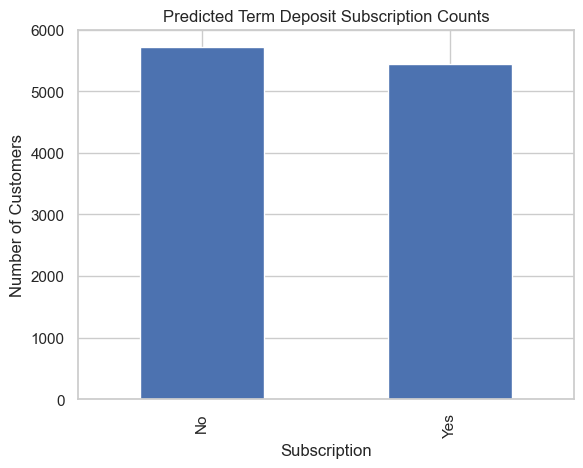

In [125]:
df['Predicted_Deposit_Label'].value_counts().plot(kind='bar')
plt.title('Predicted Term Deposit Subscription Counts')
plt.xlabel('Subscription')
plt.ylabel('Number of Customers')
plt.show()


## Prediction Summary
The Decision Tree model predicts whether each customer will subscribe to a term deposit (Yes) or not (No).

Predictions are boolean (True/False), converted to integers (1/0), then mapped to labels (Yes/No).

The results can be displayed alongside customer features like age and balance for easy interpretation.

A simple bar chart can visualize the number of predicted subscribers vs non-subscribers.

# 📌 7. Conclusion

- We explored and prepared customer data, focusing on key features like age, job, and financial status.  
- Analysis showed most customers are aged 20-60, with older individuals more likely to accept loans.  
- Built Logistic Regression and Decision Tree models achieving around 80% accuracy in predicting loan acceptance.  
- Used the Decision Tree model to clearly identify which customers are likely to subscribe to a term deposit.  
- This project highlights how data and machine learning can help banks target the right customers and improve loan offers efficiently.  
